<a href="https://colab.research.google.com/github/rajeshvalluri/TensorFlow/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Introduction
#Rajesh Valluri
#The following workbook is meant to be a practice session for building a machine learning model using Tensorflow.
#This will be loading the Fashion MNIST dataset and then training the model and validating it
#The fashion dataset has 10 distinct lables, so we have to use classification models



In [1]:
#make sure you are using the latest version of TF, and then print it to doublecheck
%tensorflow_version 2.x
import tensorflow as tf
print (tf.__version__)

2.3.0


In [7]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-092885c0-a9f7-7f75-f146-7e6c571824a2)


In [ ]:
#The importing basics
import tensorflow as tf
import tensorflow.keras 
import matplotlib
#import the different layers from keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential

In [ ]:
#start building the sequential model
#start with a blank model, and then add layers as per requirement
model = Sequential() #initialize
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)))  # 16 filters of size 3X3, Conv filters don't have activation functions
model.add(MaxPool2D(3,3)) #applying max pooling to reduce dimensionality
model.add(Flatten()) # changing the matrix into a 1D array
model.add(Dense(units=10, activation='softmax'))


In [ ]:
#compiling the model built above
#compiling includes loss functions, metrics to be used and optimization strategy and other stuff
# In order for the code to look clean, create variables for each of above
acc = tensorflow.keras.metrics.SparseCategoricalAccuracy() #because the training labels are in sparse arrays
mae = tensorflow.keras.metrics.MeanAbsoluteError()
opt = tensorflow.keras.optimizers.Adam() #default learning rate, so no need for arguments
los = 'sparse_categorical_crossentropy'
model.compile(opt,los,[acc,mae]) #the artguments to compile model are optimizer, loss function and metrics. 
#model.compile(optimizer=opt,loss=los,metrics=[mae,acc]) #another way of writing the line above, to avoid positional errors in arguments

model.summary()
print(model.loss)
print(model.metrics)
print(model.optimizer.lr)


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________
sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


In [ ]:
#Loading the fashion MNIST data set into train and test buckets
#Plot a few of the images to get a feel of the images and their labels
#Need to import matplotlib and other libraries
import matplotlib.pyplot as plt # This library plots images
import numpy as np
import pandas as pd

#load the data files (images)
#Define the source first
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images,train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [ ]:
print(train_labels.shape)
print(test_images.shape)
#Printing a list of unique labels in training set
labels = np.unique(train_labels)
print(labels)
#we can see that the labels in the dataset are just numbers and haven't given an English langugage description of those labels
#We are just going to have to create our own labels set 

(60000,)
(10000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Define the labels
# The following is copied from the Tensorflow Coursera course from Imperial college in London
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[5])

2


Label of the image is Sneaker 7


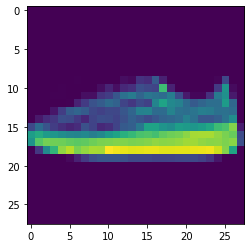

In [ ]:
#plot a random training image
rnd = np.random.randint(60000)
img = train_images[rnd]
plt.imshow(img)
print(f"Label of the image is",labels[train_labels[rnd]],train_labels[rnd])


In [ ]:
#Preprocess data by scaling the images to 0-1 range
train_images = train_images/255.
test_images =  test_images/255. 


In [ ]:
#train the model using fit()
# arguments to the fit function are training data, labels, number of epochs,and batch size
#model.fit(train_images[...,np.newaxis], train_labels,epochs=8, batch_size=128) #not exactly sure of the np.newaxis stuff. will research
history = model.fit(train_images[...,np.newaxis], train_labels,epochs=16, batch_size = 256)

Epoch 1/16
235/235 [==============================] - 14s 58ms/step - loss: 0.3417 - sparse_categorical_accuracy: 0.8791 - mean_absolute_error: 4.4200
Epoch 2/16
235/235 [==============================] - 13s 57ms/step - loss: 0.3349 - sparse_categorical_accuracy: 0.8820 - mean_absolute_error: 4.4200
Epoch 3/16
235/235 [==============================] - 13s 57ms/step - loss: 0.3299 - sparse_categorical_accuracy: 0.8839 - mean_absolute_error: 4.4200
Epoch 4/16
235/235 [==============================] - 13s 57ms/step - loss: 0.3233 - sparse_categorical_accuracy: 0.8864 - mean_absolute_error: 4.4200
Epoch 5/16
235/235 [==============================] - 13s 57ms/step - loss: 0.3196 - sparse_categorical_accuracy: 0.8871 - mean_absolute_error: 4.4200
Epoch 6/16
235/235 [==============================] - 14s 57ms/step - loss: 0.3146 - sparse_categorical_accuracy: 0.8887 - mean_absolute_error: 4.4200
Epoch 7/16
235/235 [==============================] - 13s 57ms/step - loss: 0.3119 - sparse_ca

In [ ]:
#plot some of the metrics store in "history" to see how the model is learning
#load history into a PD dataframe
df = pd.DataFrame(history.history)


(16, 3)

In [ ]:
df.head(10)
#df.shape

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.341665,0.879150,4.420001
1,0.334939,0.882000,4.419999
2,0.329923,0.883933,4.420000
3,0.323327,0.886367,4.419999
4,0.319576,0.887117,4.420001
5,0.314633,0.888733,4.420000
6,0.311946,0.889083,4.419999
7,0.308851,0.890667,4.420000
8,0.303455,0.892383,4.419999
9,0.301512,0.892733,4.420001


[Text(0.5, 0, 'Epochs')]

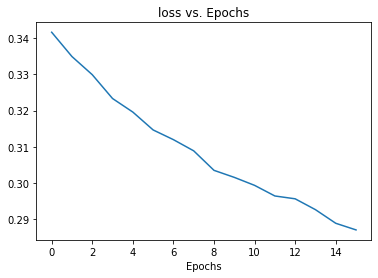

In [ ]:
#create a loss plot to trac loss
loss_plot = df.plot(y="loss", title="loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs")

In [ ]:
#Evaluating the model on test data
test_loss, test_accuracy, test_mae = model.evaluate(test_images[...,np.newaxis],test_labels)

313/313 [==============================] - 1s 5ms/step - loss: 0.3223 - sparse_categorical_accuracy: 0.8859 - mean_absolute_error: 4.4200


The label of the image is Coat 4


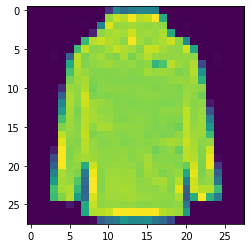

In [ ]:
#Let's plot the random test image, and then ask the model to predict it
rnd_tst = np.random.randint(10000)
tst_img = test_images[rnd_tst]
plt.imshow(tst_img)
print(f"The label of the image is",labels[test_labels[rnd_tst]],test_labels[rnd_tst])


In [ ]:
#Using the  model.predict to actually guess an image from test set
print("According to the trained model, the image is of a", labels[np.argmax(model.predict(tst_img[np.newaxis,...,np.newaxis]))])

According to the trained model, the image is of a Coat
